In [41]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

### Data Cleaning

In [66]:
# Import electricity generation data
elec_gen = pd.read_csv('raw/electric_gen.csv')
emissions = pd.read_csv('raw/co2_emissions_from_energy_consumption.csv')
elec_cost = pd.read_csv('raw/electric_cost.csv')

# Only keep desired rows
elec_gen = elec_gen[elec_gen.Column_Order == 9]
emissions = emissions[emissions.Column_Order == 14]
elec_cost = elec_cost[elec_cost.Column_Order == 6]

# Only keep rows with valid dates
elec_gen["YYYYMM"] = elec_gen.apply(lambda row : str(row["YYYYMM"]), axis=1)
elec_gen = elec_gen[elec_gen["YYYYMM"].str.contains("[1-2][0-9][0-9][0-9](1[0-2]|0[1-9])")]

emissions["YYYYMM"] = emissions.apply(lambda row : str(row["YYYYMM"]), axis=1)
emissions = emissions[emissions["YYYYMM"].str.contains("[1-2][0-9][0-9][0-9](1[0-2]|0[1-9])")]

elec_cost["YYYYMM"] = elec_cost.apply(lambda row : str(row["YYYYMM"]), axis=1)
elec_cost = elec_cost[elec_cost["YYYYMM"].str.contains("[1-2][0-9][0-9][0-9](1[0-2]|0[1-9])")]

# Convert string to date
elec_gen["Date"] = elec_gen.apply(lambda row : datetime.strptime(str(row["YYYYMM"]).strip(), "%Y%m"), axis=1)
# elec_gen.set_index("Date", inplace=True)

emissions["Date"] = emissions.apply(lambda row : datetime.strptime(str(row["YYYYMM"]).strip(), "%Y%m"), axis=1)
# emissions.set_index("Date", inplace=True)

elec_cost["Date"] = elec_cost.apply(lambda row : datetime.strptime(str(row["YYYYMM"]).strip(), "%Y%m"), axis=1)
# elec_cost.set_index("Date", inplace=True)

# Drop unneeded columns
elec_gen.drop(["YYYYMM", "MSN", "Column_Order", "Description", "Unit"], axis=1, inplace=True)
emissions.drop(["YYYYMM", "MSN", "Column_Order", "Description", "Unit"], axis=1, inplace=True)
elec_cost.drop(["YYYYMM", "MSN", "Column_Order", "Description", "Unit"], axis=1, inplace=True)

# Drop NaN values
elec_cost = elec_cost[pd.to_numeric(elec_cost["Value"], errors="coerce").notnull()]

# Drop values from before 2000 (no cryptocurrencies invented until 2008)
year_2005 = datetime(2000, 1, 1)
elec_gen = elec_gen[elec_gen["Date"] > year_2005]
emissions = emissions[emissions["Date"] > year_2005]
elec_cost = elec_cost[elec_cost["Date"] > year_2005]

# Convert values to KWh, Metric Tons of CO2, and Dollars per KWh, respectively
elec_gen["Gen [KWh]"] = elec_gen.apply(lambda row : (float(row["Value"]) * 1000000000), axis=1)
emissions["Emissions [Metric Tons CO2]"] = emissions.apply(lambda row : (float(row["Value"]) * 1000000), axis=1)
elec_cost["Cost [USD per KWh]"] = elec_cost.apply(lambda row : (float(row["Value"]) / 100), axis=1)


/tmp/ipykernel_51542/1511855243.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  elec_gen = elec_gen[elec_gen["YYYYMM"].str.contains("[1-2][0-9][0-9][0-9](1[0-2]|0[1-9])")]
/tmp/ipykernel_51542/1511855243.py:16: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  emissions = emissions[emissions["YYYYMM"].str.contains("[1-2][0-9][0-9][0-9](1[0-2]|0[1-9])")]
/tmp/ipykernel_51542/1511855243.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  elec_cost = elec_cost[elec_cost["YYYYMM"].str.contains("[1-2][0-9][0-9][0-9](1[0-2]|0[1-9])")]


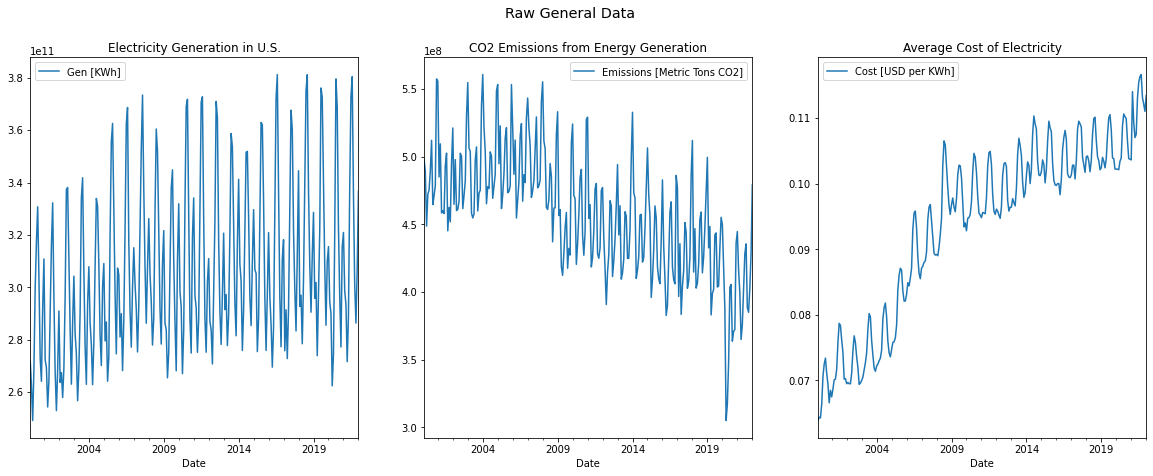

In [67]:
# Visualizations of raw data
fig, axes = plt.subplots(1, 3, figsize=(20,7))
plt.suptitle("Raw General Data", size='x-large')
elec_gen.plot(ax=axes[0], x="Date", y="Gen [KWh]", kind="line", title="Electricity Generation in U.S.")
emissions.plot(ax=axes[1],x="Date", y="Emissions [Metric Tons CO2]", kind="line", title="CO2 Emissions from Energy Generation")
elec_cost.plot(ax=axes[2],x="Date", y="Cost [USD per KWh]", kind="line", title="Average Cost of Electricity")
plt.show()